<a href="https://colab.research.google.com/github/igomez666/coursera/blob/master/8-CNN/ANNmultimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN multimodal**  


Queremos entrenar un modelo con imagenes y datos estructurados


In [1]:
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2



## **2 - Conjunto de Datos**  

Loads the CIFAR10 dataset.

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

The classes are:



| Label | Description |medio|humano|
|-------|-------------|-----|------|
| 0     | airplane    | 0   |  1   |
| 1     | automobile  | 1   |  1   |
| 2     | bird        | 0   |  0   |
| 3     | cat         | 1   |  0   |
| 4     | deer        | 1   |  0   |
| 5     | dog         | 1   |  0   |
| 6     | frog        | 2   |  0   |
| 7     | horse       | 1   |  0   |
| 8     | ship        | 2   |  1   |
| 9     | truck       | 1   |  1   |

In [2]:

import keras
from keras.utils import to_categorical

(x_train, y_train_0), (x_test, y_test_0) = keras.datasets.cifar10.load_data()

# Normalizar las imágenes (valores entre 0 y 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train_0, 10)
y_test = to_categorical(y_test_0, 10)



Generamos unos metadatos imaginados que son:
* Medio: Aire = 0, Tierra=1, Agua=2
* Tipo: Maquinas=0, Animales=0

In [3]:
datos_train = np.zeros((y_train.shape[0], 2))
datos_test = np.zeros((y_test.shape[0], 2))

datos_train[:, 0:1] = np.where(np.isin(y_train_0, [6, 8]), 2, np.where(np.isin(y_train_0, [1,3,4,5,7,9]), 1, 0))
datos_test[:, 0:1] =  np.where(np.isin(y_test_0, [6, 8]),  2, np.where(np.isin(y_test_0, [1,3,4,5,7,9]), 1, 0))

datos_train[:, 1:2] = np.where(np.isin(y_train_0, [0,1,8,9]), 1, 0)
datos_test[:, 1:2] = np.where(np.isin(y_test_0, [0,1,8,9]), 1, 0)


In [4]:
print(x_train.shape)
print(datos_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 2)
(50000, 10)


# Modelo CNN como baseline

Entrenamos una CNN solo con las imagenes, para comparar sus resultados con los del modelo multimodal.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input

# Definir el modelo
model = Sequential()

# Primera capa de convolución
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Segunda capa de convolución
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Tercera capa de convolución
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Aplanar las salidas de las capas de convolución
model.add(Flatten())

# Capa completamente conectada
model.add(Dense(64, activation='relu'))


# Capa de salida
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 437,066 (1.67 MB)

 Trainable params: 437,066 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=12, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.2577 - loss: 1.9738 - val_accuracy: 0.4659 - val_loss: 1.4682
Epoch 2/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4823 - loss: 1.4252 - val_accuracy: 0.5691 - val_loss: 1.2301
Epoch 3/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5616 - loss: 1.2345 - val_accuracy: 0.5911 - val_loss: 1.1723
Epoch 4/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6051 - loss: 1.1270 - val_accuracy: 0.6463 - val_loss: 1.0055
Epoch 5/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6377 - loss: 1.0355 - val_accuracy: 0.6651 - val_loss: 0.9646
Epoch 6/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6604 - loss: 0.9781 - val_accuracy: 0.6865 - val_loss: 0.9088
Epoch 7/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6804 - loss: 0.9136 - val_accuracy: 0.6973 - val_loss: 0.8654
Epoch 8/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6983 - loss: 0.8724 - val_accuracy: 

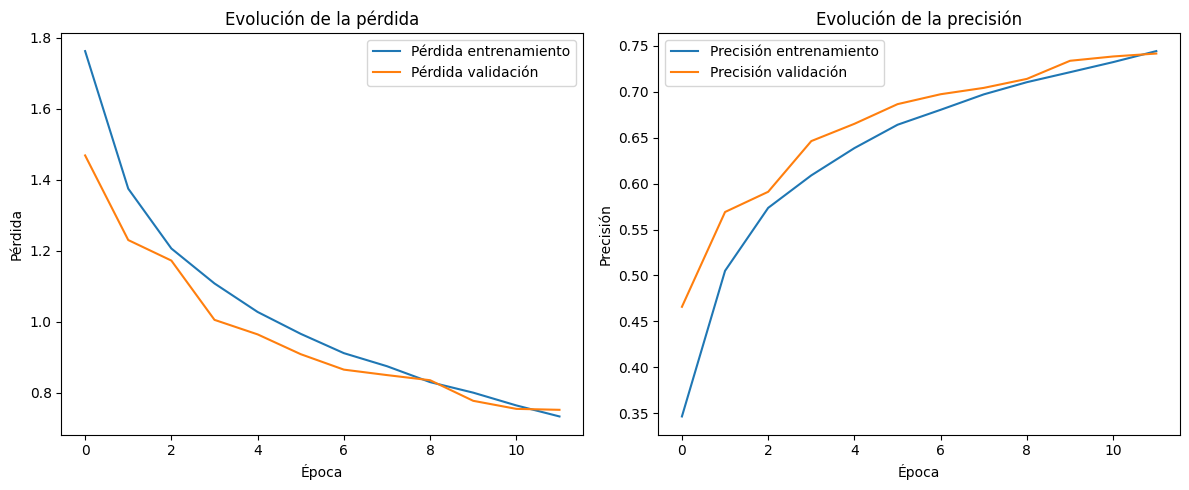

In [7]:
# Dibuja las curvas de entrenamiento y validación (pérdida y precisión)
plt.figure(figsize=(12, 5))

# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida')
plt.legend()

# Curva de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


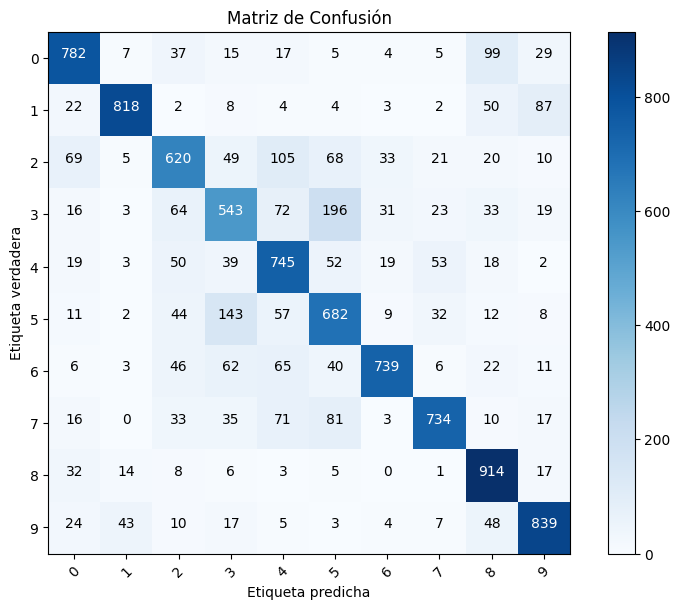

In [8]:
# prompt: dibuja la matriz de confusion

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Dibujar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()

tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()


# Modelo Multimodal

Contruimos el modelo con dos redes en paralelo:

* Imagenes -> Red Convolucional
* Metadatos -> Red Densa

Unimos las salidas de las dos redes y añadimos una capa densa de  clasificación

Utilizamos el API funcional de Keras

In [9]:
from keras.models import Model
from keras.layers import Input, Dense, concatenate, Conv2D, MaxPooling2D, Flatten,Dropout
from keras.utils import plot_model

imagen_input=Input(shape=(32, 32, 3), name='Imagenes')
conv1 = Conv2D(64, (3, 3), activation='relu')(imagen_input)
max1 = MaxPooling2D((2, 2))(conv1)
drop1 = Dropout(0.25)(max1)
conv2 = Conv2D(128, (3, 3), activation='relu')(drop1)
max2 = MaxPooling2D((2, 2))(conv2)
drop2= Dropout(0.25)(max2)
conv3 = Conv2D(256, (3, 3), activation='relu')(max2)
max3 = MaxPooling2D((2, 2))(conv3)
drop3 = Dropout(0.25)(max3)
imagen_output = Flatten()(drop3)

metadatos_input=Input(shape=(2,), name='Metadatos')
meta_output = Dense(64, activation='relu')(metadatos_input)

concat = concatenate([imagen_output, meta_output], name='Concatenate')
final_model_output = Dense(10, activation='softmax')(concat)

final_model = Model(inputs=[imagen_input, metadatos_input], outputs=final_model_output, name='Final_output')
final_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
historia = final_model.fit([x_train,datos_train], y_train, epochs=12, batch_size=256,validation_data=([x_test,datos_test], y_test))

Epoch 1/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.3892 - loss: 1.7541 - val_accuracy: 0.7156 - val_loss: 0.8739
Epoch 2/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7411 - loss: 0.7754 - val_accuracy: 0.7972 - val_loss: 0.5819
Epoch 3/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8075 - loss: 0.5387 - val_accuracy: 0.8232 - val_loss: 0.4679
Epoch 4/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8308 - loss: 0.4525 - val_accuracy: 0.8408 - val_loss: 0.4156
Epoch 5/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8458 - loss: 0.4035 - val_accuracy: 0.8460 - val_loss: 0.3919
Epoch 6/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8524 - loss: 0.3743 - val_accuracy: 0.8566 - val_loss: 0.3664
Epoch 7/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8654 - loss: 0.3468 - val_accuracy: 0.8588 - val_loss: 0.3601
Epoch 8/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8752 - loss: 0.3271 - val_accuracy: 

Curvas de entrenamiento

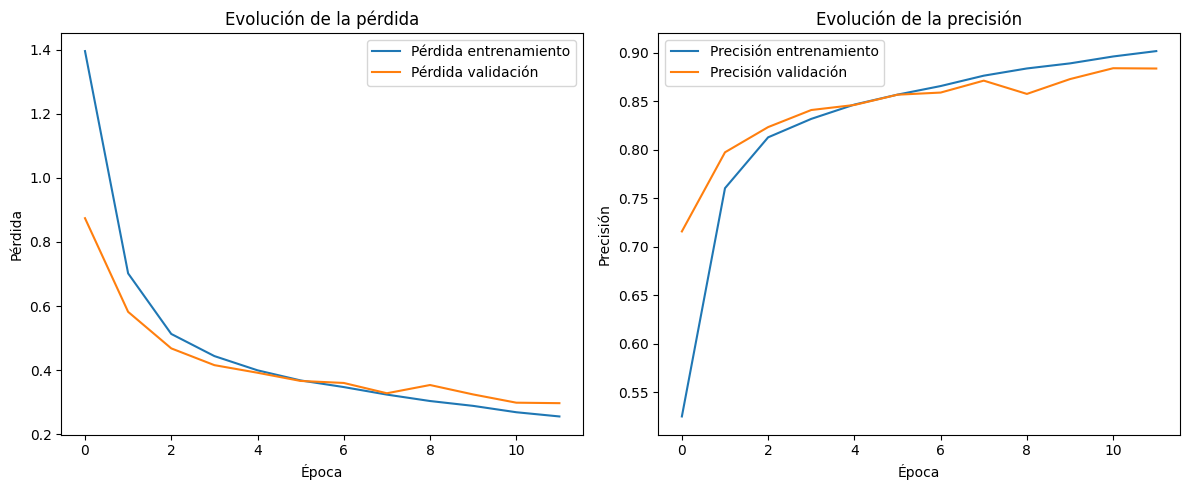

In [11]:


import matplotlib.pyplot as plt
# Dibuja las curvas de entrenamiento y validación (pérdida y precisión)
plt.figure(figsize=(12, 5))

# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(historia.history['loss'], label='Pérdida entrenamiento')
plt.plot(historia.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida')
plt.legend()

# Curva de precisión
plt.subplot(1, 2, 2)
plt.plot(historia.history['accuracy'], label='Precisión entrenamiento')
plt.plot(historia.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


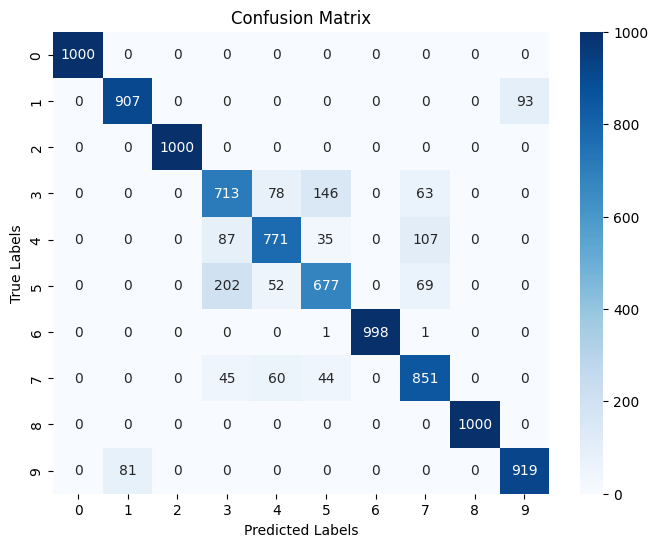

In [12]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = final_model.predict([x_test, datos_test])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Dibujamos un esquema de nuestra red multimodal

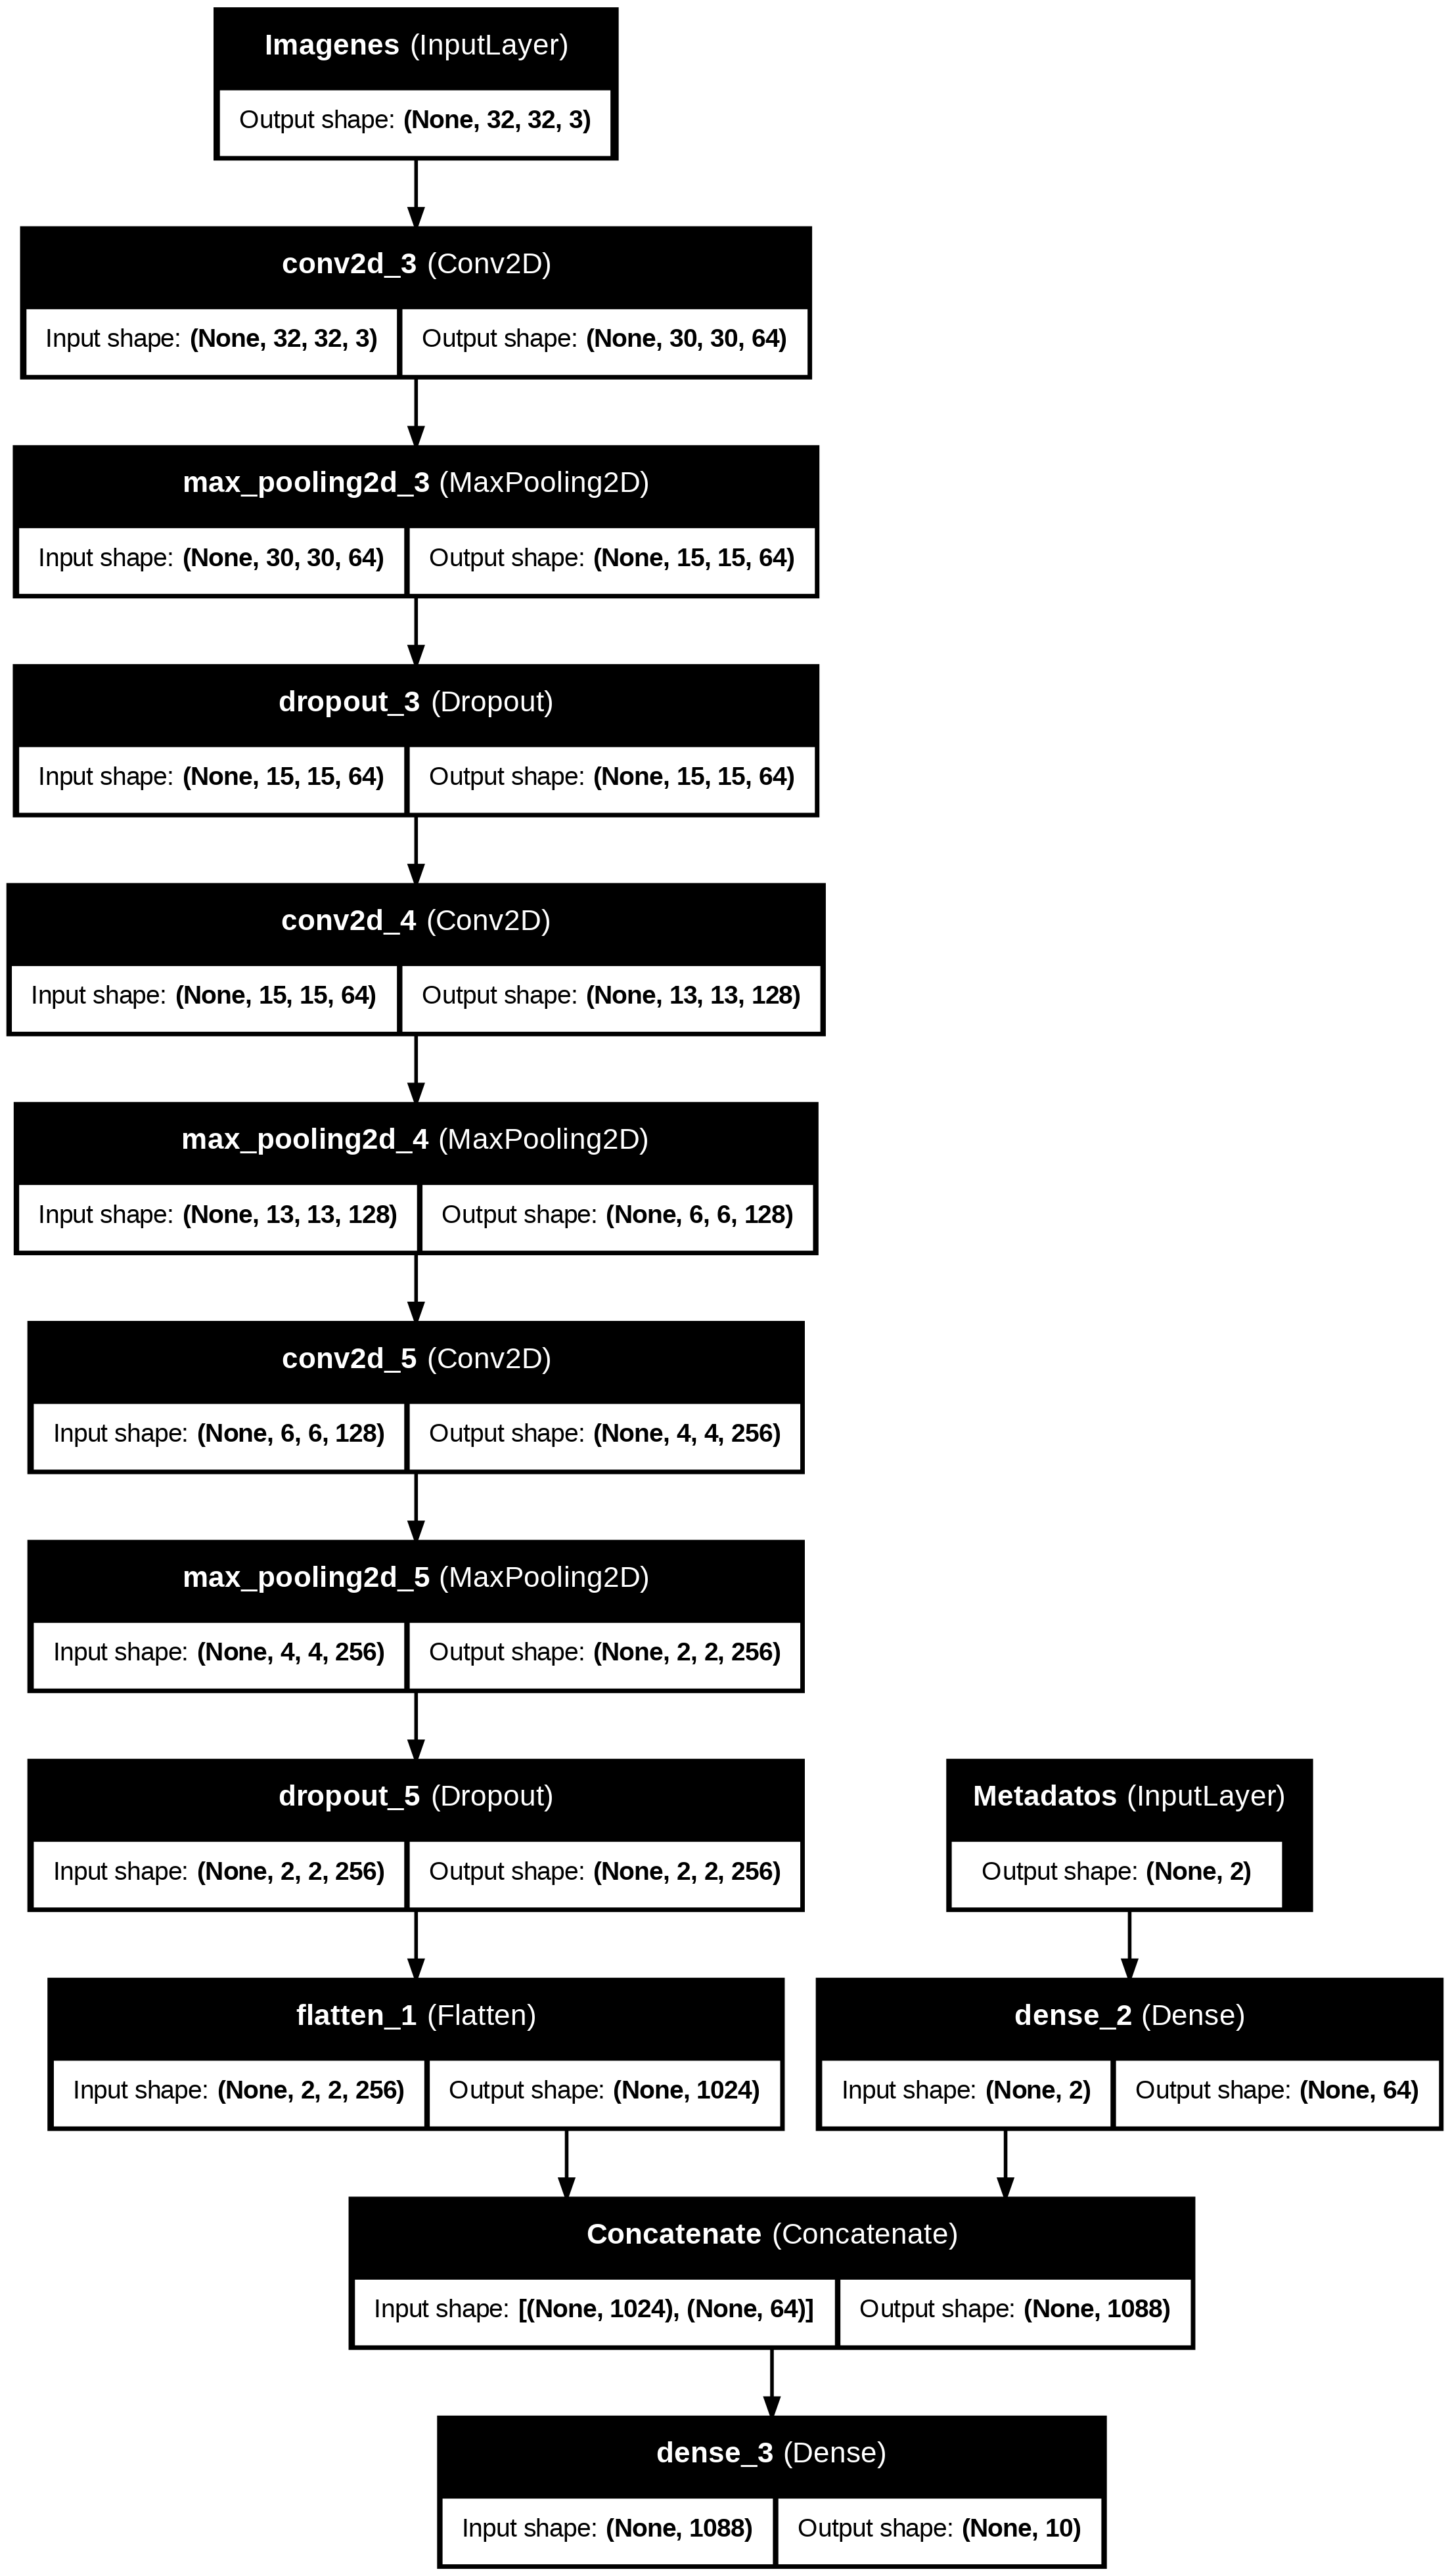

In [13]:
from keras.utils import plot_model

plot_model(final_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)